In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
train=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

### Data description

In [9]:
with open('../data/house-prices-advanced-regression-techniques/data_description.txt') as f:
    lines = f.readlines()
for line in lines:
    print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

### Data exploration

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [35]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
for col in train.columns:
    print('Column ', col , ' values:', train[col].unique()) 

Column  Id  values: [   1    2    3 ... 1458 1459 1460]
Column  MSSubClass  values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Column  MSZoning  values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column  LotFrontage  values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Column  LotArea  values: [ 8450  9600 11250 ... 17217 13175  9717]
Column  Street  values: ['Pave' 'Grvl']
Column  Alley  values: [nan 'Grvl' 'Pave']
Column  LotShape  values: ['Reg' 'IR1' 'IR2' 'IR3']
C

In [21]:
train.describe().iloc[:,:19]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000


In [22]:
train.describe().iloc[:,19:]

,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Here we can check the columns that have at least one NA value.

In [28]:
train.isna().sum()[train.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [30]:
test.isna().sum()[test.isna().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Now we check the columns that have more than one NA in both, the test set and the trainset:

In [14]:
trainwns=train.loc[:, train.columns != 'SalePrice']
NAcolumns=trainwns.columns[(trainwns.isna().sum()>0) | (test.isna().sum()>0)]
print(NAcolumns)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


We are going to model the data with the variables that have any NA value:

In [15]:
traindata=train.drop(NAcolumns, axis=1,inplace=False)
testdata=test.drop(NAcolumns,axis=1,inplace=False)

In [16]:
traindata

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,2,2008,Normal,208500
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,5,2007,Normal,181500
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,9,2008,Normal,223500
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,2,2006,Abnorml,140000
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,12,2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,40,0,0,0,0,0,8,2007,Normal,175000
1456,1457,20,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,0,0,2,2010,Normal,210000
1457,1458,70,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,60,0,0,0,0,2500,5,2010,Normal,266500
1458,1459,20,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,0,112,0,0,0,0,4,2010,Normal,142125


In [17]:
for col in traindata.columns:
    print('Column ', col , ' values:', traindata[col].unique()) 

Column  Id  values: [   1    2    3 ... 1458 1459 1460]
Column  MSSubClass  values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Column  LotArea  values: [ 8450  9600 11250 ... 17217 13175  9717]
Column  Street  values: ['Pave' 'Grvl']
Column  LotShape  values: ['Reg' 'IR1' 'IR2' 'IR3']
Column  LandContour  values: ['Lvl' 'Bnk' 'Low' 'HLS']
Column  LotConfig  values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column  LandSlope  values: ['Gtl' 'Mod' 'Sev']
Column  Neighborhood  values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Column  Condition1  values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Column  Condition2  values: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Column  BldgType  values: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'T

In [24]:
salesxyear=traindata[['YrSold', 'SalePrice']].groupby(['YrSold'], as_index=False).mean().sort_values(by='YrSold', ascending=False)
salesxyear

,YrSold,SalePrice
4,2010,177393.674286
3,2009,179432.103550
2,2008,177360.838816
1,2007,186063.151976
0,2006,182549.458599


<BarContainer object of 5 artists>

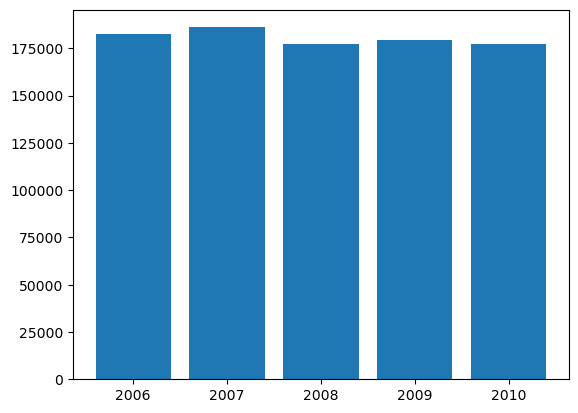

In [25]:
import matplotlib.pyplot as plt
plt.bar(salesxyear['YrSold'],salesxyear['SalePrice'])

In [9]:
salesxym=traindata[['MoSold','YrSold', 'SalePrice']].groupby(['MoSold','YrSold'], as_index=False).mean().sort_values(by=['YrSold','MoSold'], ascending=False)
salesxym

,MoSold,YrSold,SalePrice
34,7,2010,121750.000000
29,6,2010,181639.583333
24,5,2010,178422.250000
19,4,2010,171344.025641
14,3,2010,203181.285714
9,2,2010,174823.333333
4,1,2010,163852.600000
54,12,2009,164014.533333
50,11,2009,156381.818182
46,10,2009,175206.592593


In [26]:
traindata["DaySold"]=1
traindata.rename(columns={"YrSold": "year", "MoSold": "month","DaySold":"day"},inplace=True)

In [28]:
traindata["datesold"]=pd.to_datetime(traindata[["year", "month", "day"]] )

In [29]:
traindata["datesold"]

0      2008-02-01
1      2007-05-01
2      2008-09-01
3      2006-02-01
4      2008-12-01
          ...    
1455   2007-08-01
1456   2010-02-01
1457   2010-05-01
1458   2010-04-01
1459   2008-06-01
Name: datesold, Length: 1460, dtype: datetime64[ns]

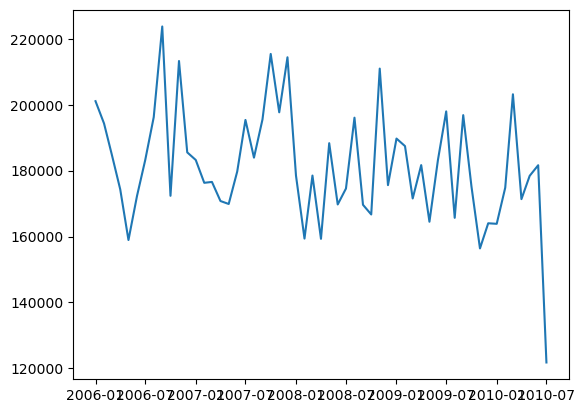

In [34]:
salesxyear=traindata[['datesold', 'SalePrice']].groupby(['datesold'], as_index=False).mean().sort_values(by='datesold', ascending=False)
plt.plot(salesxyear['datesold'], salesxyear['SalePrice'])

In [26]:
numeric_features =  traindata.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


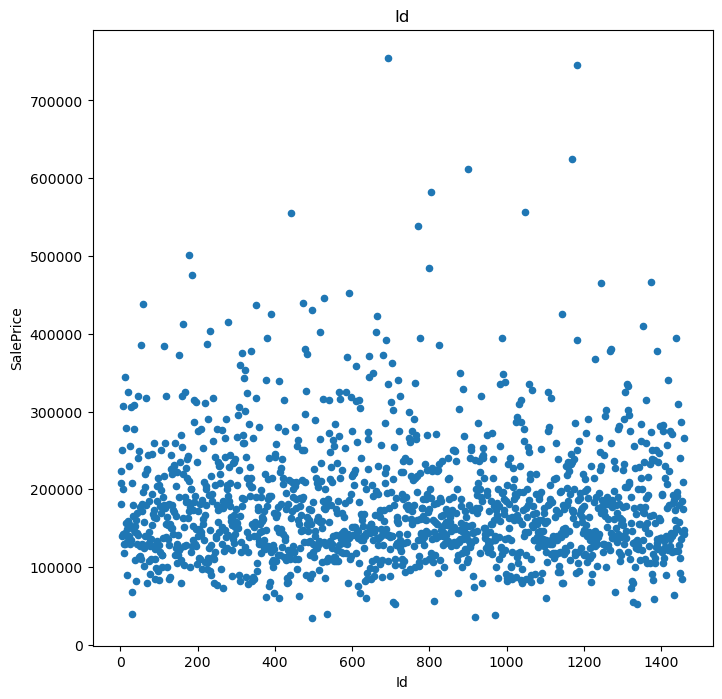

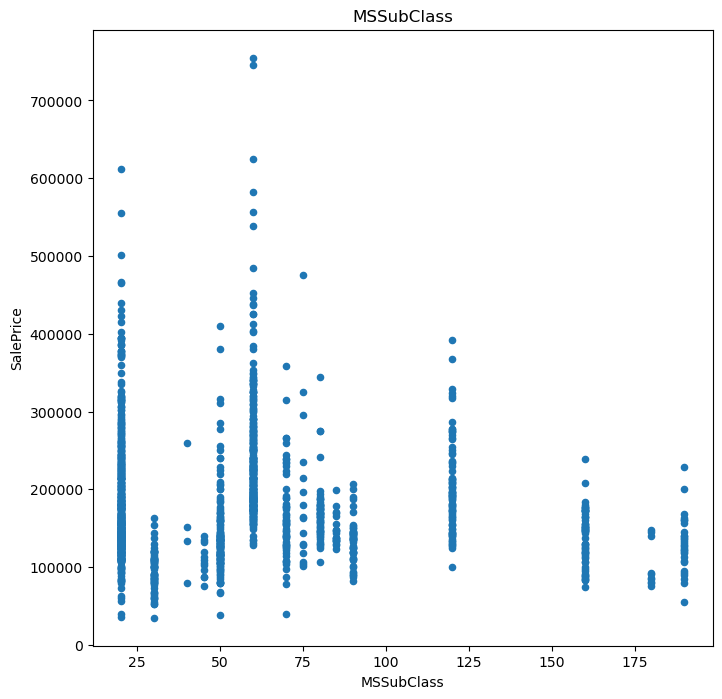

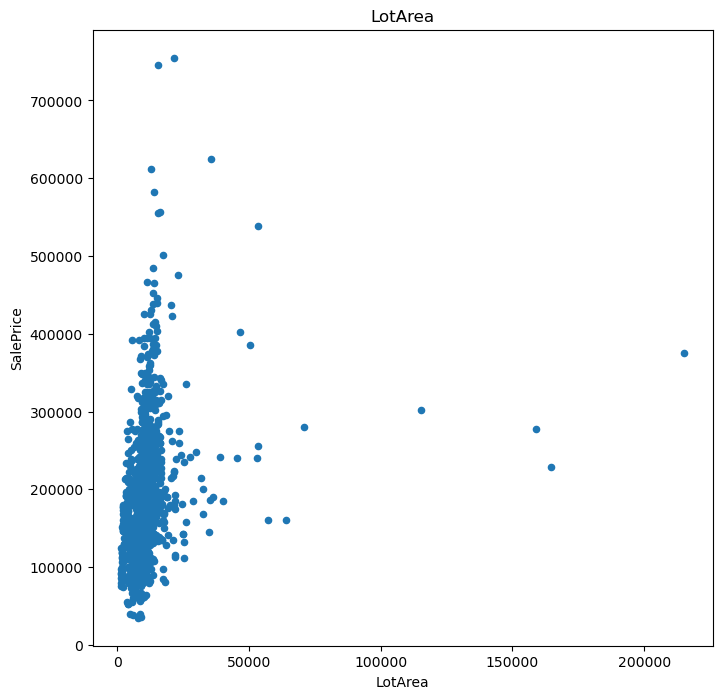

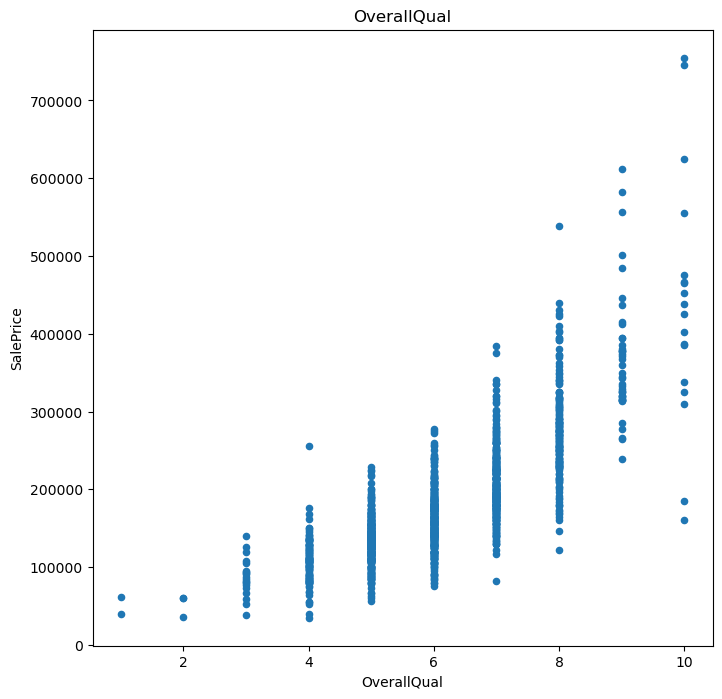

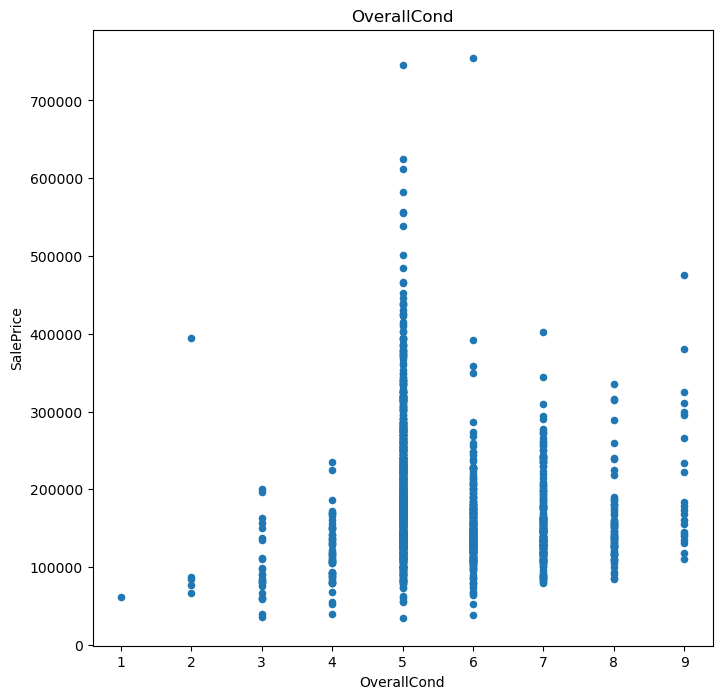

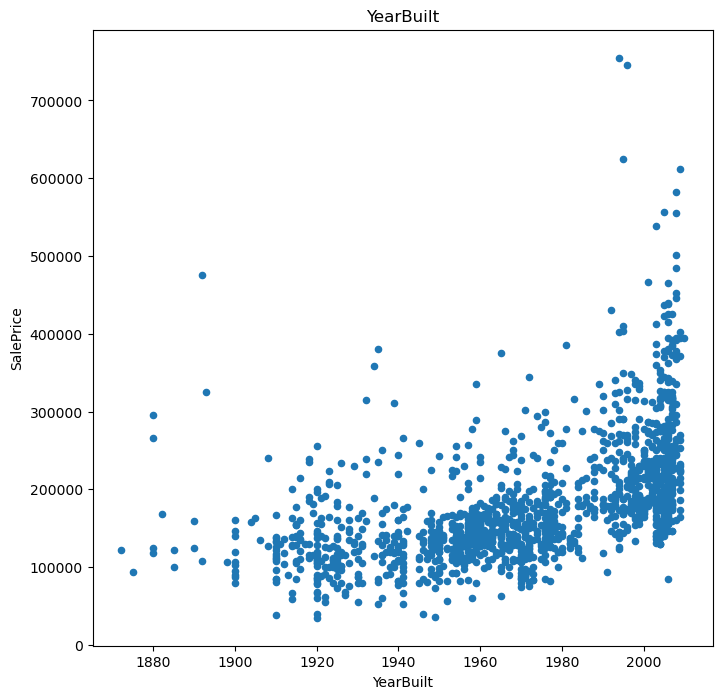

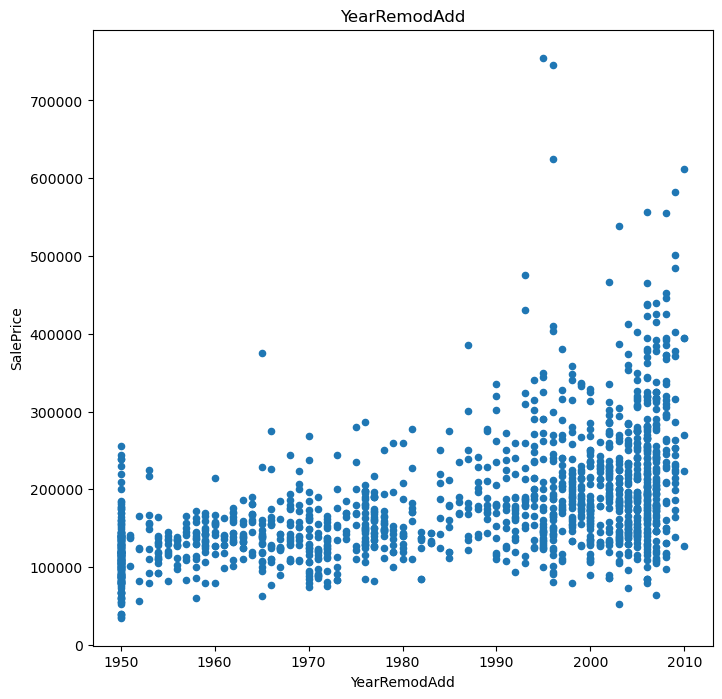

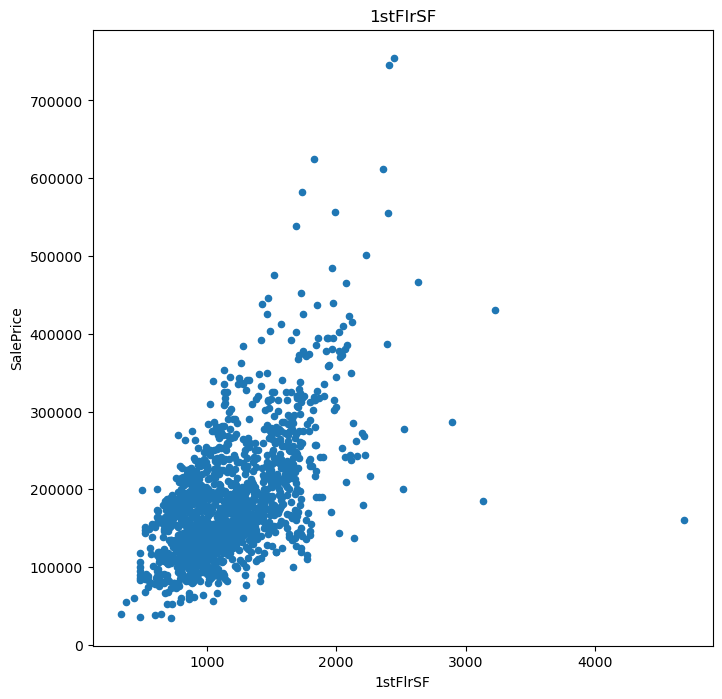

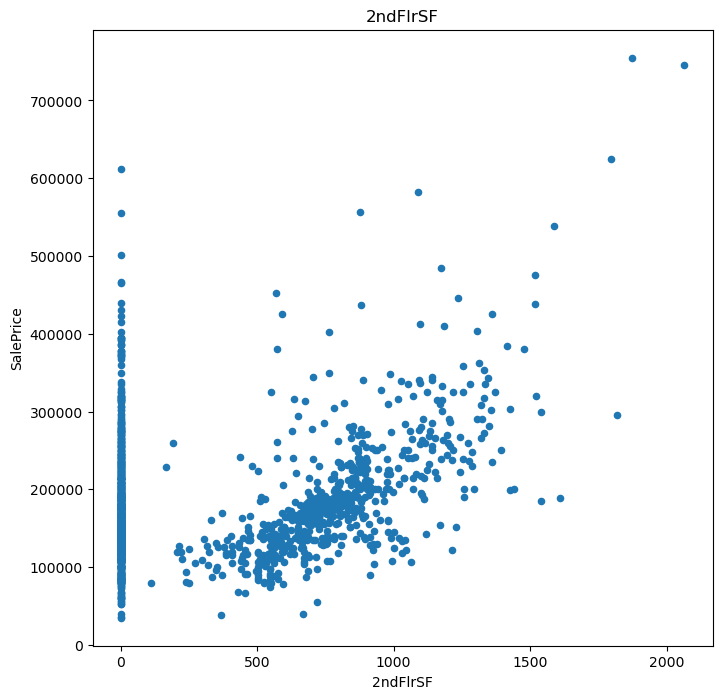

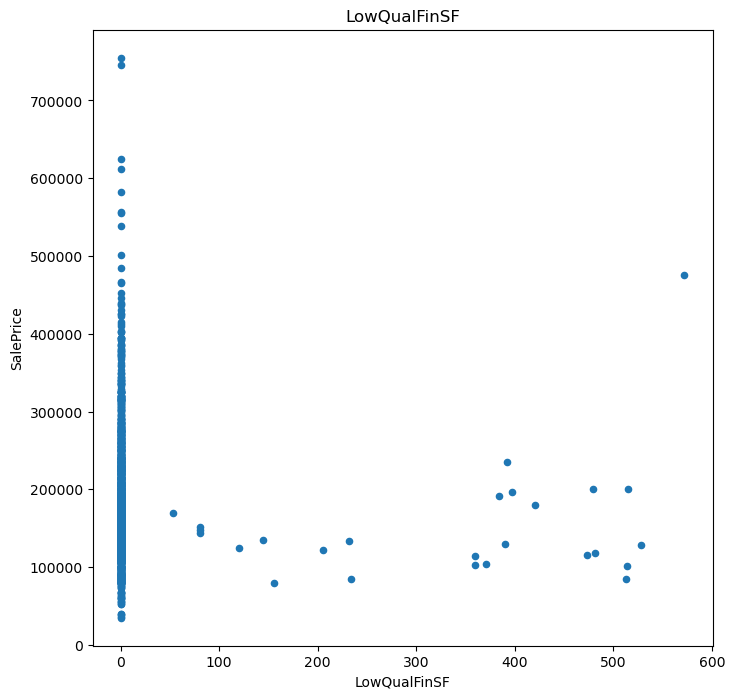

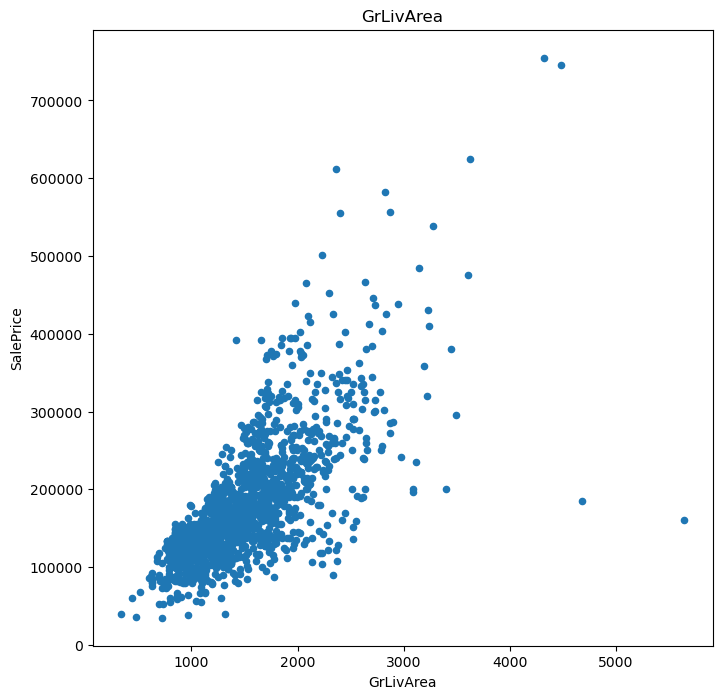

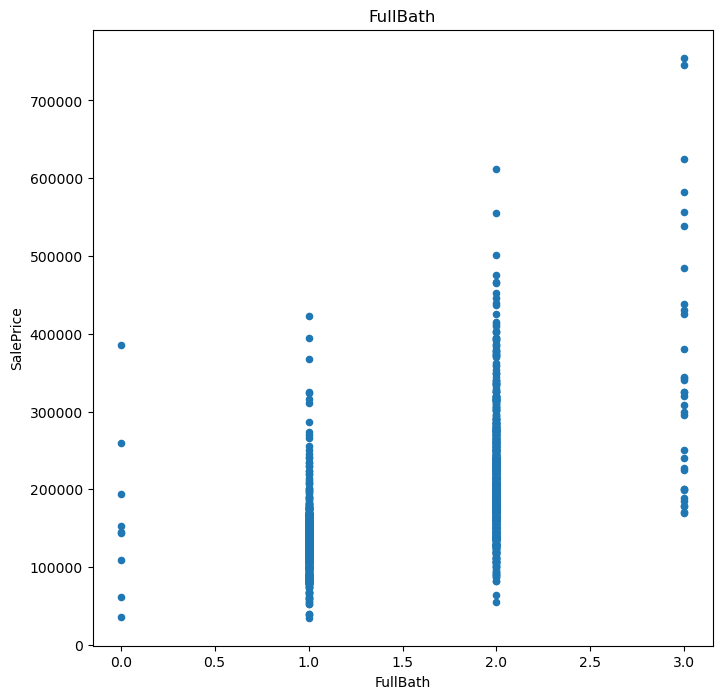

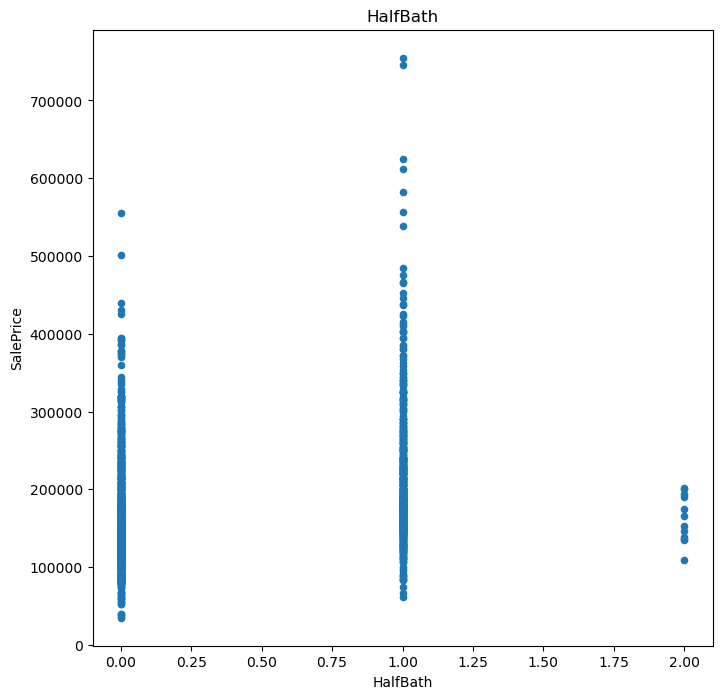

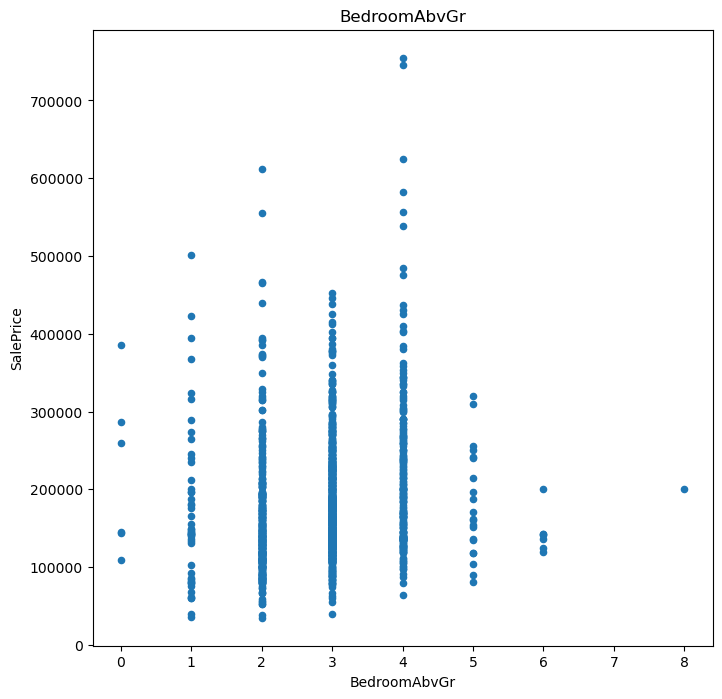

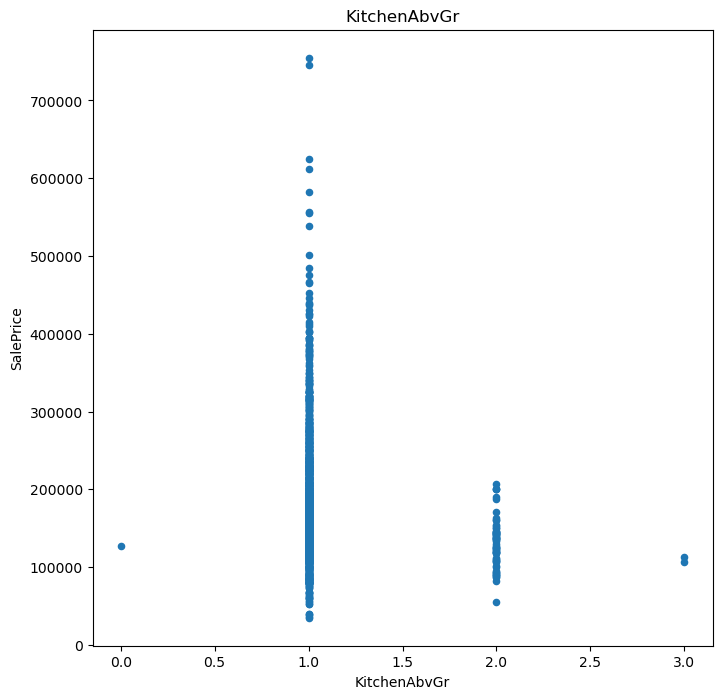

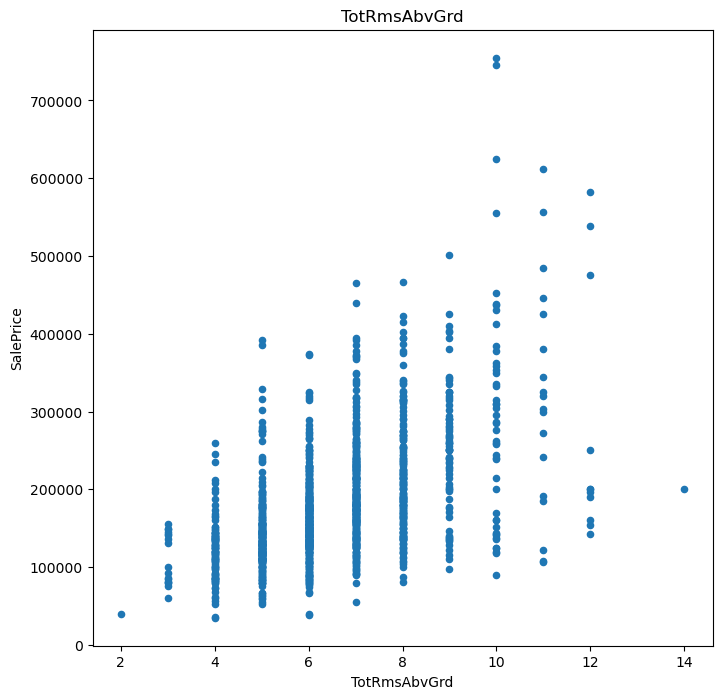

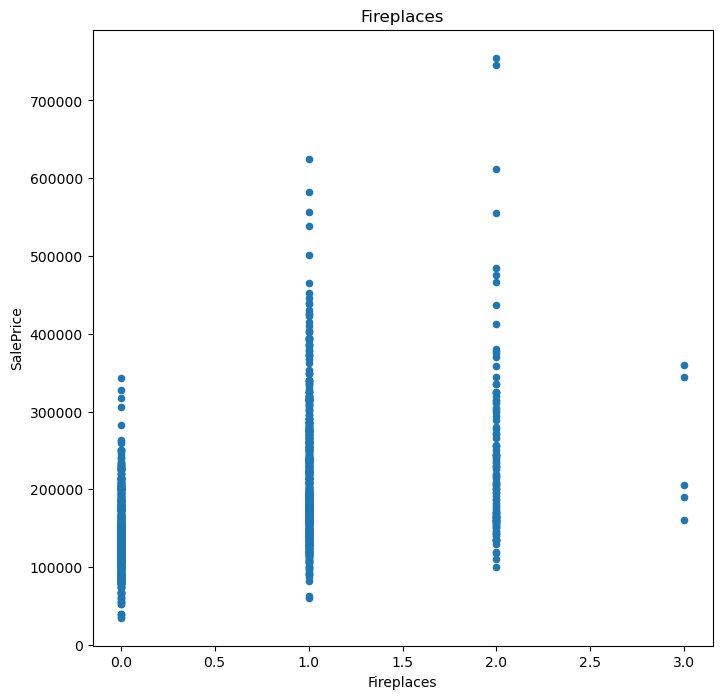

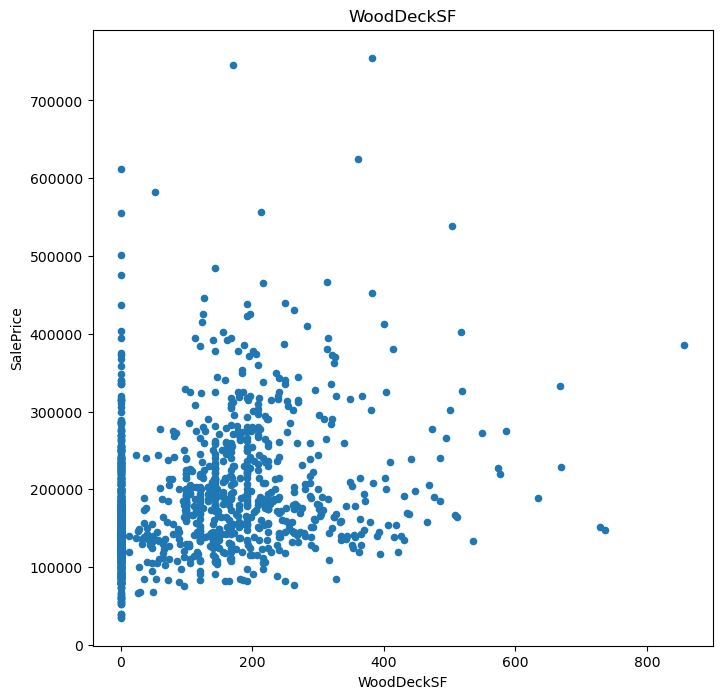

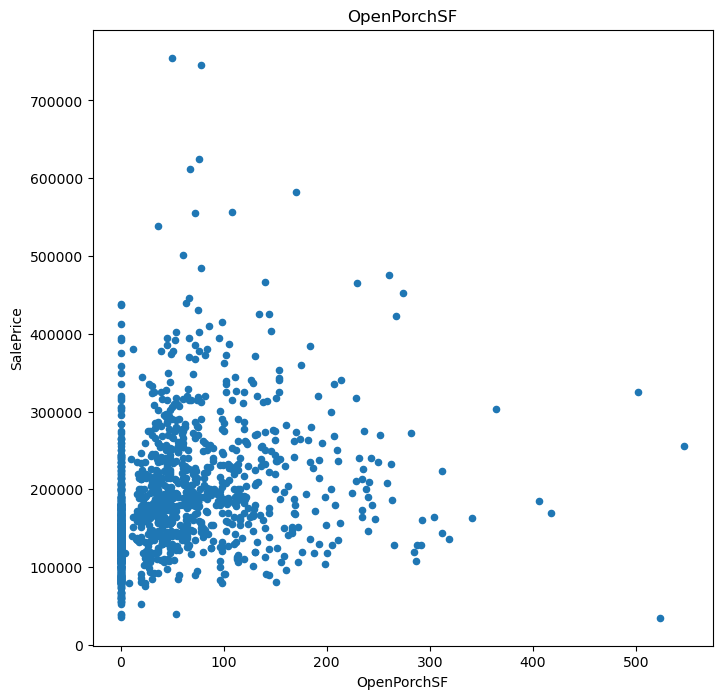

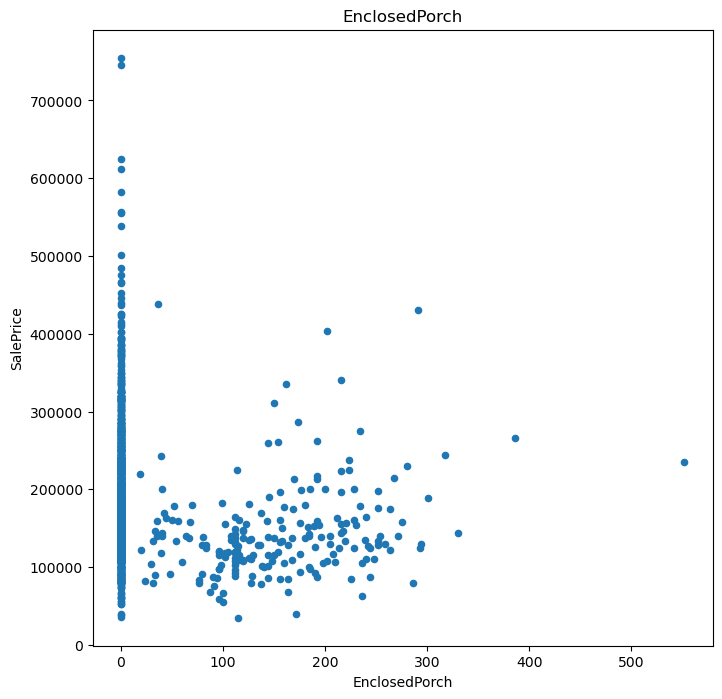

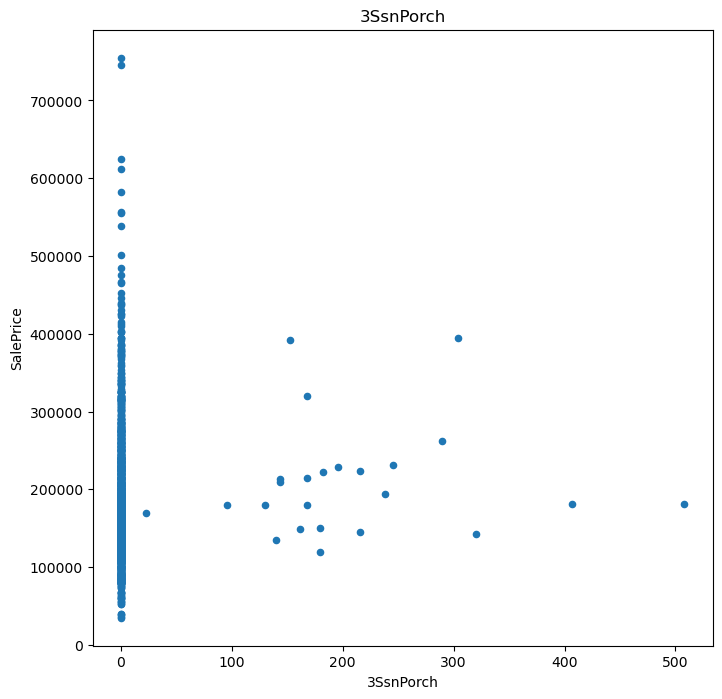

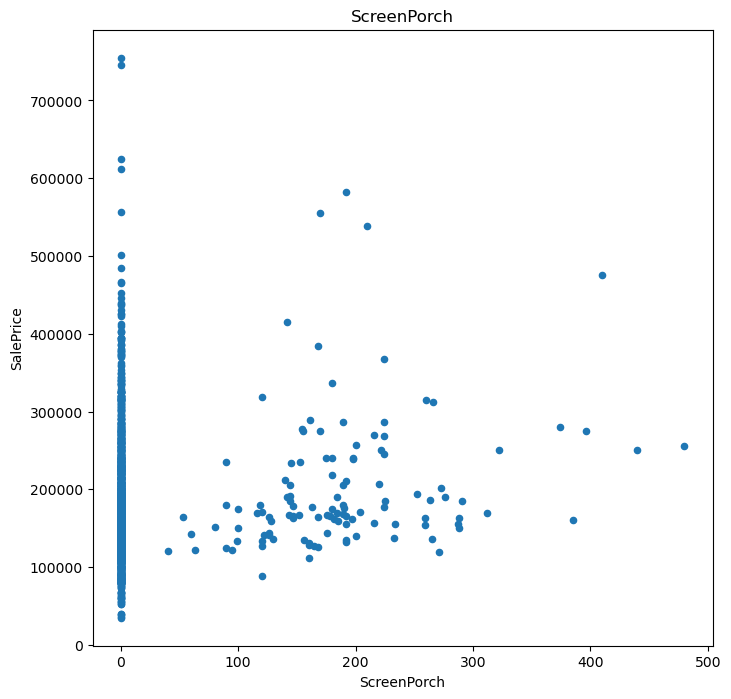

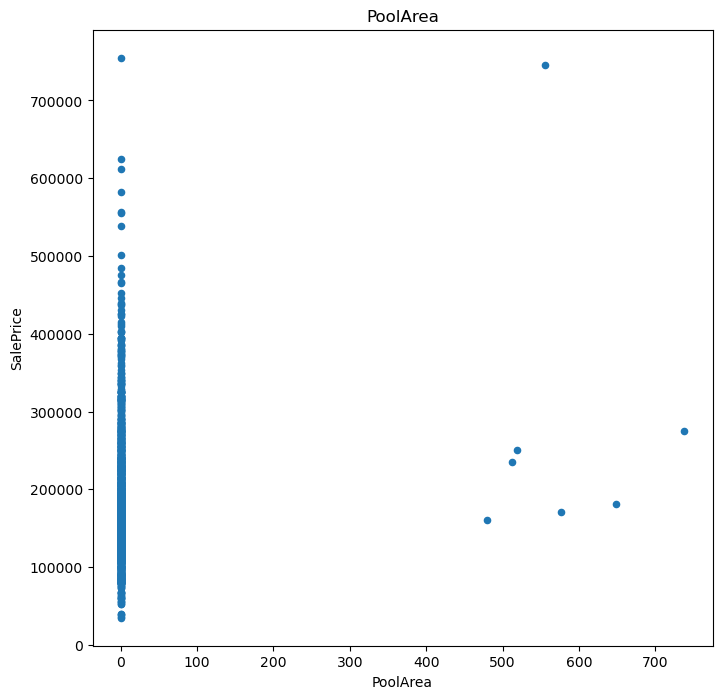

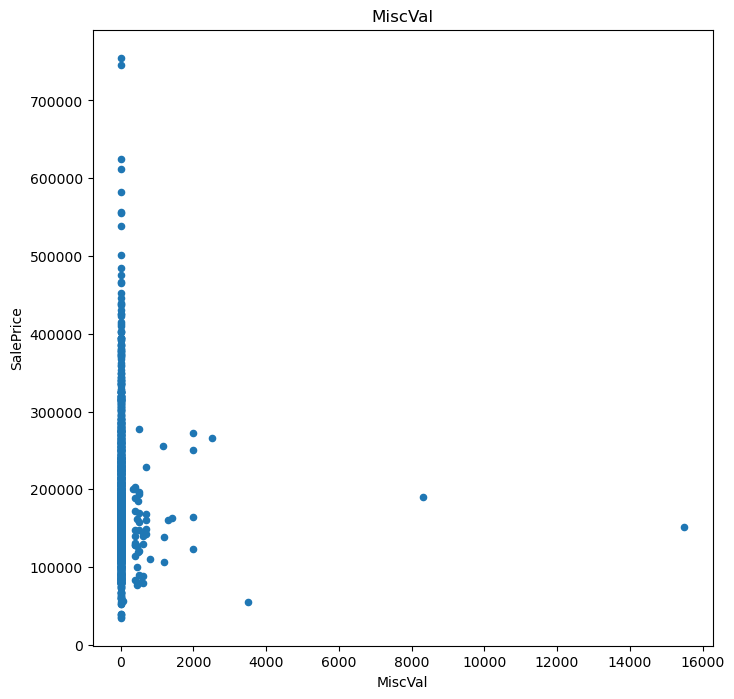

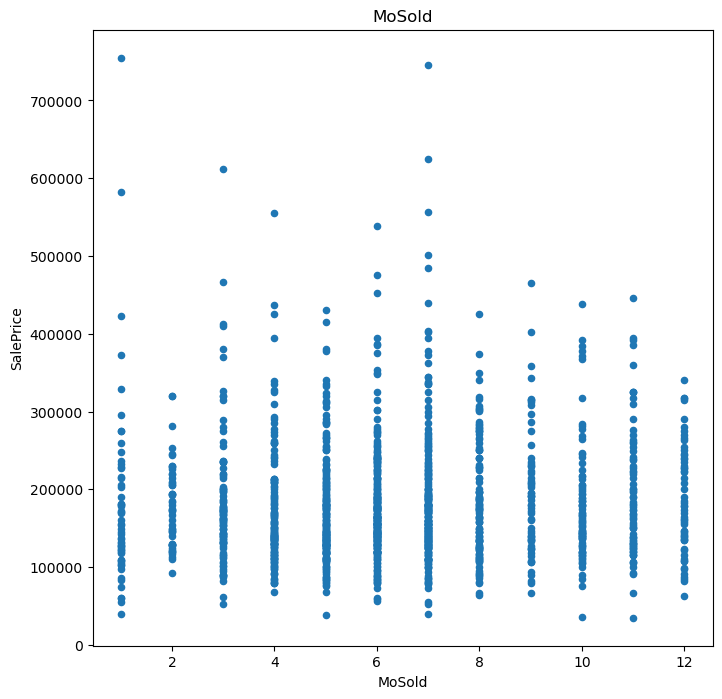

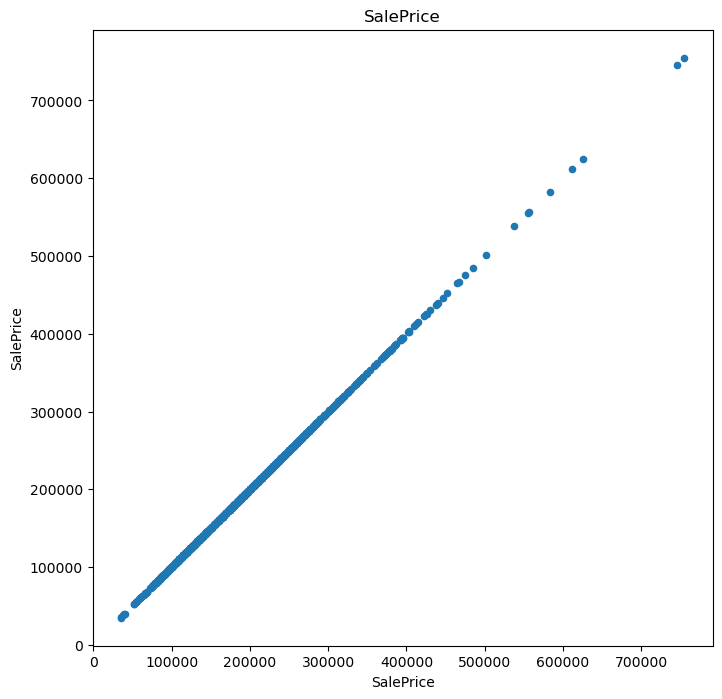

In [27]:
years = [ 'YrSold' ] 
label = 'SalePrice'
numerics = [f for f in  numeric_features if f not in years] 
for col in numerics:
    traindata.plot.scatter(x=col, y=label, figsize=(8,8))
    plt.title(col)
plt.show()

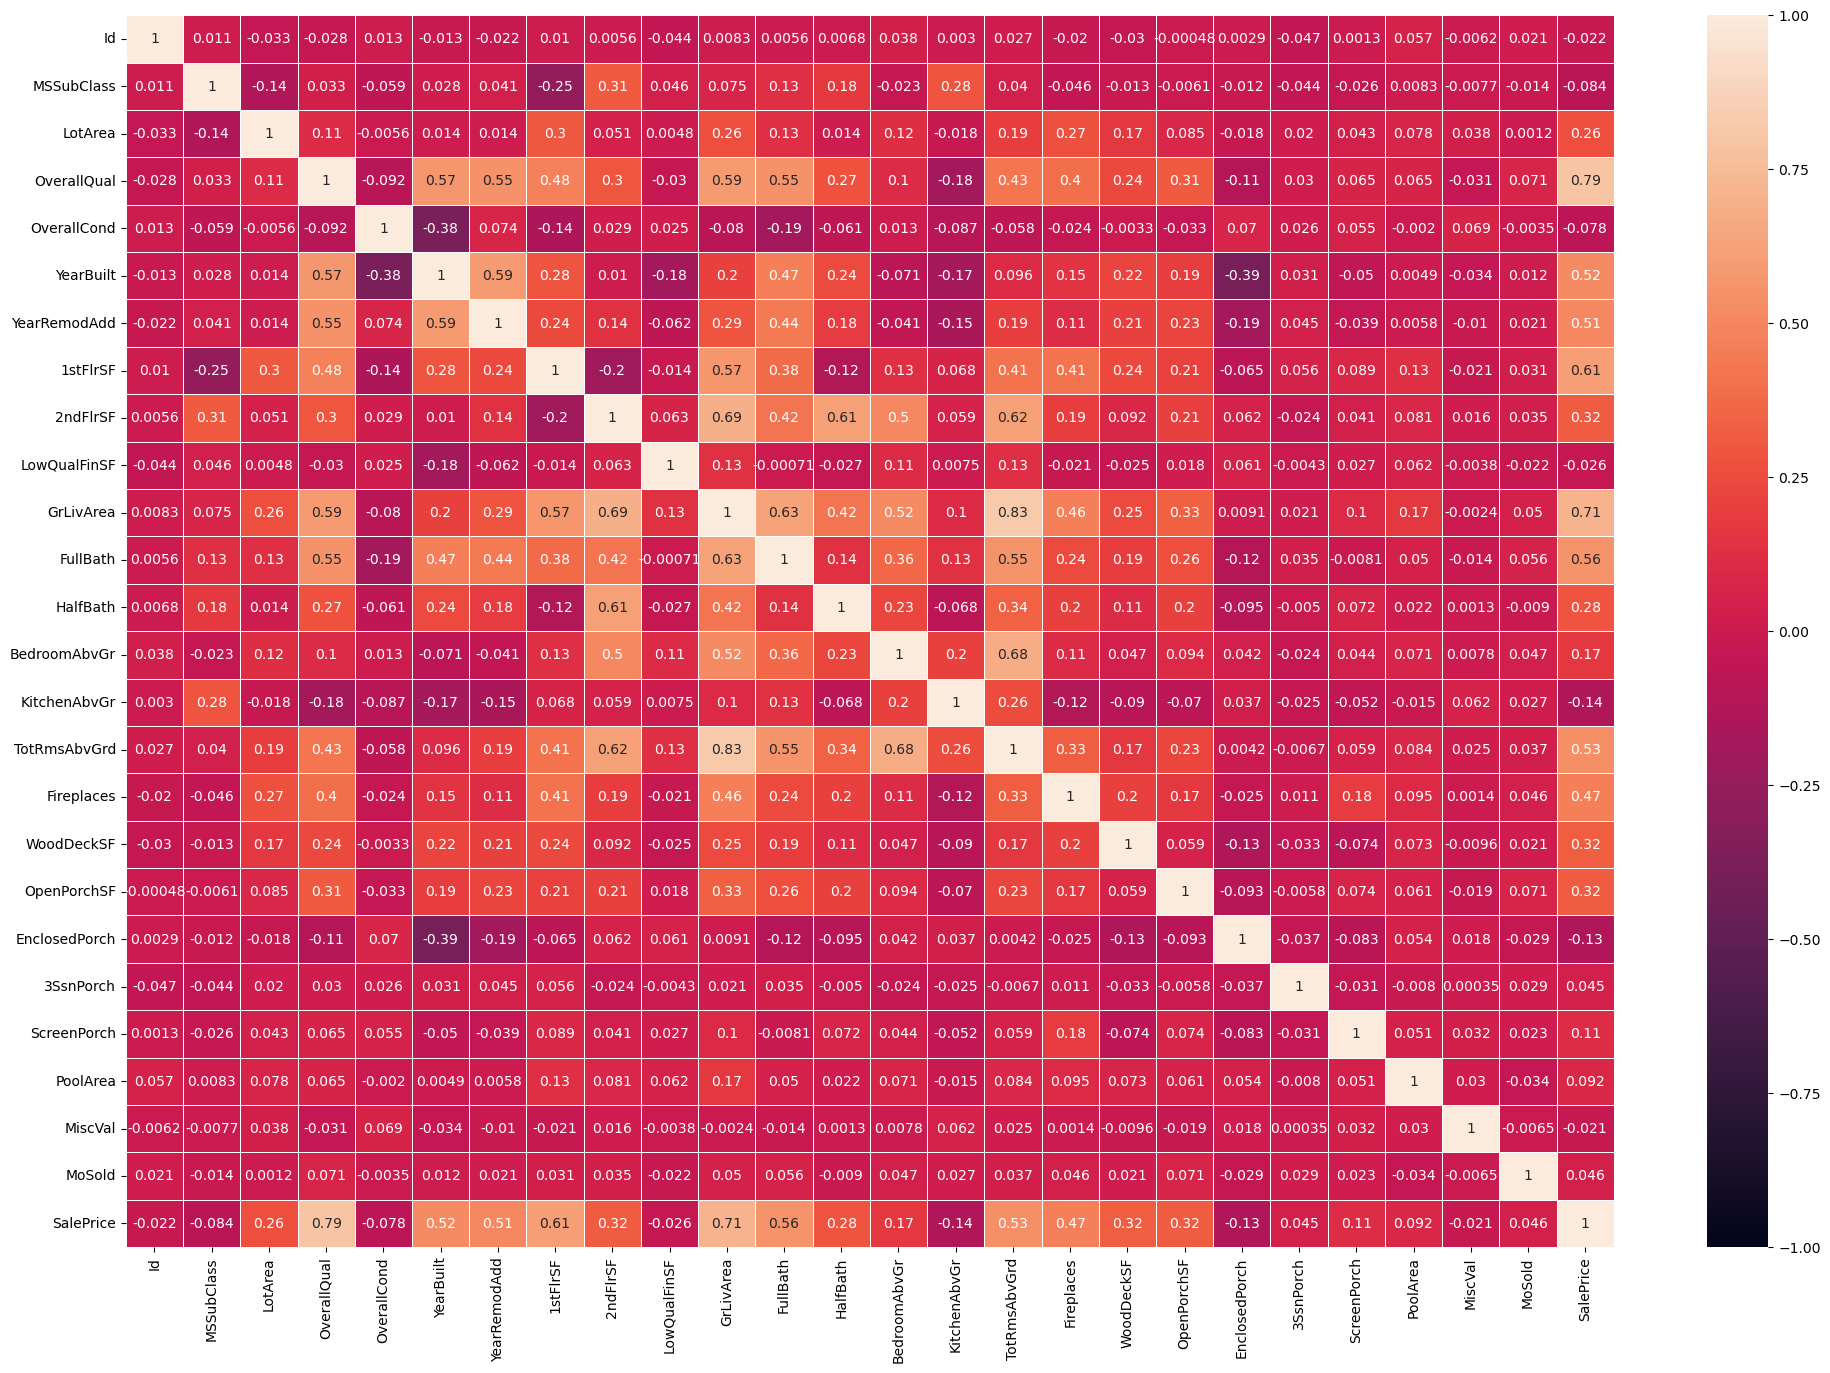

In [28]:
matrix  = traindata [numerics].corr()
plt.figure(figsize = (24,16))
ax  = sns.heatmap(matrix,  vmin=-1, vmax=1 ,  linewidth=.5,  annot=True) 

In [29]:
matrix

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,0.010496,0.005590,-0.044230,...,-0.019772,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.251758,0.307886,0.046474,...,-0.045569,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.299475,0.050986,0.004779,...,0.271364,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.476224,0.295493,-0.030429,...,0.396765,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.144203,0.028942,0.025494,...,-0.023820,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.281986,0.010308,-0.183784,...,0.147716,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.240379,0.140024,-0.062419,...,0.112581,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,1.000000,-0.202646,-0.014241,...,0.410531,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,0.605852
2ndFlrSF,0.005590,0.307886,0.050986,0.295493,0.028942,0.010308,0.140024,-0.202646,1.000000,0.063353,...,0.194561,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,0.319334
LowQualFinSF,-0.044230,0.046474,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.014241,0.063353,1.000000,...,-0.021272,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.025606


In [55]:
from numpy import fabs
most_correlated=matrix.iloc[-1,:][matrix.iloc[-1,:] > fabs(0.2)].sort_values(ascending=False).index
most_correlated

Index(['SalePrice', 'OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea'],
      dtype='object')

In [56]:
traindata.index=traindata['Id']

In [57]:
train_with_variables=traindata[most_correlated]
train_with_variables

,SalePrice,OverallQual,GrLivArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea
Id,,,,,,,,,,,,,,
1,208500,7,1710,856,2,8,2003,2003,0,0,854,61,1,8450
2,181500,6,1262,1262,2,6,1976,1976,1,298,0,0,0,9600
3,223500,7,1786,920,2,6,2001,2002,1,0,866,42,1,11250
4,140000,7,1717,961,1,7,1915,1970,1,0,756,35,0,9550
5,250000,8,2198,1145,2,9,2000,2000,1,192,1053,84,1,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,175000,6,1647,953,2,7,1999,2000,1,0,694,40,1,7917
1457,210000,6,2073,2073,2,7,1978,1988,2,349,0,0,0,13175
1458,266500,7,2340,1188,2,9,1941,2006,2,0,1152,60,0,9042


In [63]:
for col in train_with_variables.iloc[:,1:]:
   print(col, ' : ', train_with_variables[col].unique())

OverallQual  :  [ 7  6  8  5  9  4 10  3  1  2]
GrLivArea  :  [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 1947 2462 1232 2668 1541  882 1616
 1355 1867 2161 1707 1382 1767 1651 2158 2060 1920 2234  968 1525 1802
 1340 2082 3608 1217 1593 2727 1431 1726 3112 2229 1713 1121 1279 1310
  848 1284 1442

In [66]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [71]:
enc.fit(train_with_variables[['FullBath','TotRmsAbvGrd','OverallQual',
                            'TotRmsAbvGrd','Fireplaces','HalfBath']])

OneHotEncoder()

In [72]:
enc.categories_

[array([0, 1, 2, 3], dtype=int64),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([0, 1, 2], dtype=int64)]

In [74]:
enc.transform(train_with_variables[['FullBath','TotRmsAbvGrd','OverallQual',
                            'TotRmsAbvGrd','Fireplaces','HalfBath']]).toarray()

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_with_variables.iloc[:,1:], train_with_variables['SalePrice'], test_size=0.2)

In [110]:
from sklearn.linear_model import LinearRegression, Lasso

In [82]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
predictions=lm.predict(X_test)

C:\Users\ALEX\miniconda3\envs\Python-data-wranglig\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

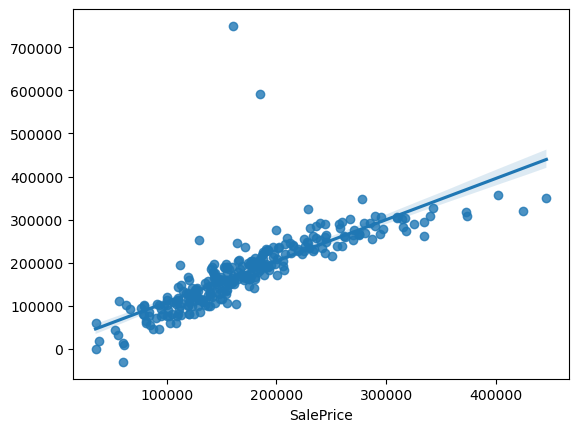

In [86]:
sns.regplot(y_test,predictions)

In [91]:
lm.score(X_train,y_train)

0.8157944144036187

In [129]:
lasso = Lasso(selection='random',tol=1e-9,positive=True,max_iter=5000)
lasso.fit(X_train,y_train)

Lasso(max_iter=5000, positive=True, selection='random', tol=1e-09)

In [130]:
lasso.score(X_train,y_train)

0.8108222629220814

In [128]:
lasso.max_iter

1000

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
regr = RandomForestRegressor(max_depth=16, random_state=18,n_estimators=5000)



In [157]:
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, n_estimators=5000, random_state=18)

In [158]:
regr.score(X_train,y_train)

0.9821384043631529

In [148]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(regr,X_train, y_train, cv=5)

In [150]:
cv_results['test_score'].mean()

0.864344009927066

### Predictions submit

In [151]:
regr.fit(train_with_variables.iloc[:,1:],train_with_variables['SalePrice'])

RandomForestRegressor(max_depth=16, n_estimators=5000, random_state=0)

In [152]:
regr.score(train_with_variables.iloc[:,1:],train_with_variables['SalePrice'])

0.9796832862134782

In [153]:
test=testdata[most_correlated[1:]]

In [154]:
predictions=regr.predict(test)

In [155]:
pd.DataFrame({'Id':testdata['Id'],'predictions':predictions})

,Id,predictions
0,1461,122980.748463
1,1462,156968.084906
2,1463,177914.625351
3,1464,182104.767188
4,1465,194752.374724
...,...,...
1454,2915,81414.790613
1455,2916,81782.933352
1456,2917,155474.783310
1457,2918,121656.239744


In [106]:
testdata.index.values

array([   0,    1,    2, ..., 1456, 1457, 1458], dtype=int64)